Missing Values:
 Student_ID        0
Math_Score       10
English_Score    12
Attendance        0
Study_Hours       0
dtype: int64


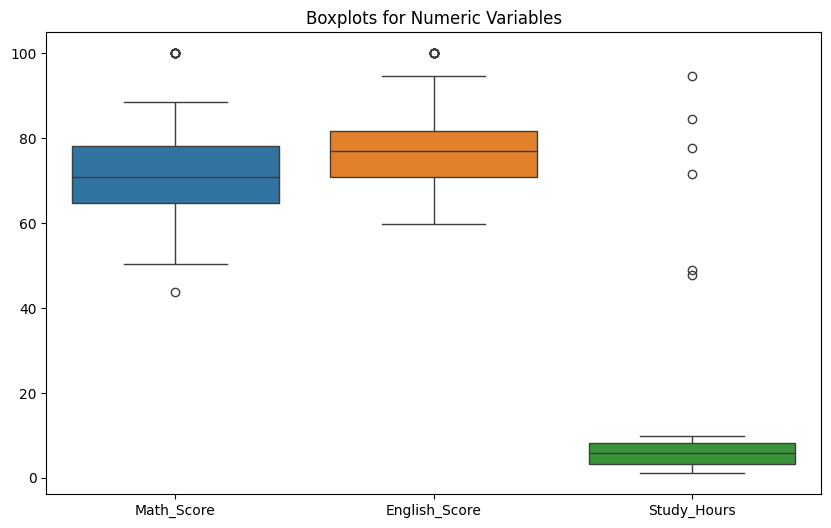

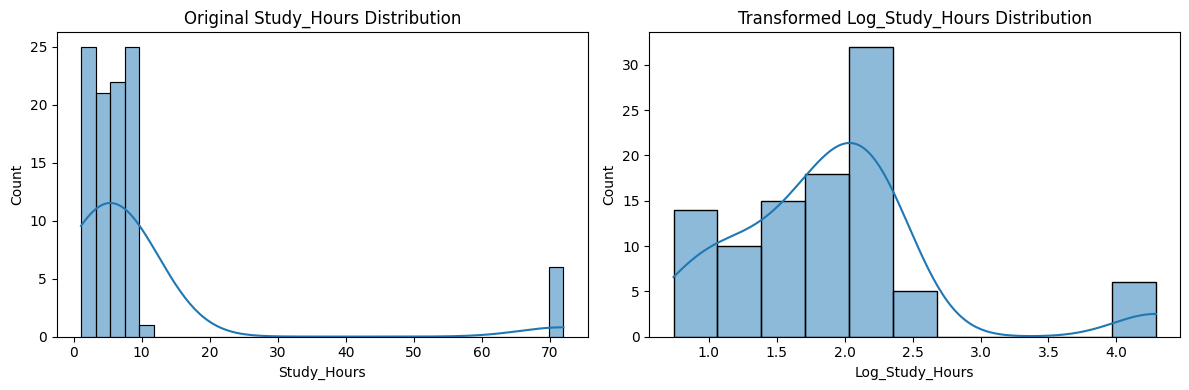

Enter Student_ID to update:  12
Enter new Attendance value (0 or 1):  1
Enter new Study_Hours value:  22


Updated DataFrame:
    Student_ID  Math_Score  English_Score  Attendance  Study_Hours  \
0            1   74.967142      63.677034           1     8.523821   
1            2   68.617357      71.634837           1     7.263768   
2            3   76.476885      72.258284           0     4.680576   
3            4   85.230299      68.581782           1     2.559649   
4            5   67.658466      73.709714           0     2.407933   
..         ...         ...            ...         ...          ...   
95          96   55.364851      62.000000           1     1.821580   
96          97   72.961203      67.929141           0     3.873823   
97          98   72.610553      76.229801           1     9.550558   
98          99   70.051135      75.465670           0     9.555464   
99         100   75.000000      65.856238           1     6.160941   

    Log_Study_Hours  
0          2.253796  
1          2.111881  
2          1.737053  
3          1.269662  
4          1.226106  
..      

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample dataset
np.random.seed(42)
data = {
    'Student_ID': range(1, 101),
    'Math_Score': np.random.normal(70, 10, 100),
    'English_Score': np.random.normal(75, 8, 100),
    'Attendance': np.random.choice([0, 1], size=100),
    'Study_Hours': np.random.uniform(1, 10, 100),
}

df = pd.DataFrame(data)

# Introduce missing values and outliers for demonstration purposes
df.loc[df['Student_ID'] % 10 == 0, 'Math_Score'] = np.nan
df.loc[df['Student_ID'] % 8 == 0, 'English_Score'] = np.nan
df.loc[df['Student_ID'] % 15 == 0, 'Study_Hours'] = df['Study_Hours'] * 10  # Introduce outliers

# 1. Handling missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Use mean imputation for numeric variables with missing values
# Insert a value for mean imputation
df['Math_Score'].fillna(100, inplace=True) #<INSERT_VALUE_HERE>
df['English_Score'].fillna(100, inplace=True) #<INSERT_VALUE_HERE>

# 2. Handling outliers in numeric variables
# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Math_Score', 'English_Score', 'Study_Hours']])
plt.title('Boxplots for Numeric Variables')
plt.show()

# Handling outliers using the IQR method
def handle_outliers(column, replacement_value):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), replacement_value, df[column])

# Apply the outlier handling function to numeric variables
# Insert a value for outlier handling
handle_outliers('Math_Score', 75)#<INSERT_VALUE_HERE>
handle_outliers('English_Score', 62) #<INSERT_VALUE_HERE>
handle_outliers('Study_Hours', 72) #<INSERT_VALUE_HERE>

# 3. Data transformations
# Applying log transformation to reduce skewness in Study_Hours
df['Log_Study_Hours'] = np.log1p(df['Study_Hours'])

# Visualize the transformation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Study_Hours'], kde=True)
plt.title('Original Study_Hours Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_Study_Hours'], kde=True)
plt.title('Transformed Log_Study_Hours Distribution')

plt.tight_layout()
plt.show()

# Update values interactively
# Insert values for updating Student_ID, Attendance, and Study_Hours
student_id_to_update = int(input("Enter Student_ID to update: "))
attendance_value = int(input("Enter new Attendance value (0 or 1): "))
study_hours_value = float(input("Enter new Study_Hours value: "))

# Update values in the dataframe
df.loc[df['Student_ID'] == student_id_to_update, 'Attendance'] = attendance_value
df.loc[df['Student_ID'] == student_id_to_update, 'Study_Hours'] = study_hours_value

# Display the updated dataframe
print("Updated DataFrame:")
print(df)

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("tecdiv.csv")

In [3]:
data

,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,TECOC328,72026696D,8698227548,7.20,7.30,8.90,9.20
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,TECOC326,72026682D,7774072850,7.05,7.45,9.05,9.40
...,...,...,...,...,...,...,...,...,...,...,...
59,1/20/2022 9:24:40,pratik.meshram20@pccoepune.org,Pratik Amrut Meshram,pratik.meshram20@pccoepune.org,TECOC381,72164278M,7666479857,0.00,0.00,9.09,9.36
60,1/20/2022 9:36:14,prasad.zore19@pccoepune.org,Prasad Zore,prasad.zore@outlook.com,TECOC360,72026843F,7387645749,8.31,8.27,9.45,9.77
61,1/20/2022 9:42:34,sudhir.varu19@pccoepune.org,SUDHIR VARU,sudhirvaru01@gmail.com,TECOC351,72026799E,9657017250,8.31,8.42,8.53,8.64
62,1/20/2022 10:22:05,bhagyashree.takale19@pccoepune.org,Bhagyashree Gorakh Takale,bbhagyashree002@gmail.com,TECOC345,72026760K,8805813576,8.70,8.50,8.70,8.80


In [4]:
print("The first five rows are as follows: ")
data.head()

The first five rows are as follows: 


,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,TECOC328,72026696D,8698227548,7.20,7.30,8.90,9.20
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,TECOC326,72026682D,7774072850,7.05,7.45,9.05,9.40


In [5]:
print("The last five rows are as follows: ")
data.tail()

The last five rows are as follows: 


,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
59,1/20/2022 9:24:40,pratik.meshram20@pccoepune.org,Pratik Amrut Meshram,pratik.meshram20@pccoepune.org,TECOC381,72164278M,7666479857,0.00,0.00,9.09,9.36
60,1/20/2022 9:36:14,prasad.zore19@pccoepune.org,Prasad Zore,prasad.zore@outlook.com,TECOC360,72026843F,7387645749,8.31,8.27,9.45,9.77
61,1/20/2022 9:42:34,sudhir.varu19@pccoepune.org,SUDHIR VARU,sudhirvaru01@gmail.com,TECOC351,72026799E,9657017250,8.31,8.42,8.53,8.64
62,1/20/2022 10:22:05,bhagyashree.takale19@pccoepune.org,Bhagyashree Gorakh Takale,bbhagyashree002@gmail.com,TECOC345,72026760K,8805813576,8.70,8.50,8.70,8.80
63,1/20/2022 10:38:06,sarvesh.waghmare19@pccoepune.org,Waghmare Sarvesh Jitendra,sarvesh.waghmare19@pccoepune.org,TECOC356,72026817G,7218935035,6.90,7.07,9.05,9.20


In [6]:
# Describtion about the dataset
data.describe()

,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
count,6.400000e+01,64.000000,64.000000,64.000000,64.000000
mean,8.623097e+09,8.834219,9.095469,9.292031,9.377187
std,9.132070e+08,11.187839,11.171986,0.528523,0.495185
min,7.028870e+09,0.000000,0.000000,6.900000,7.200000
25%,7.766559e+09,7.237500,7.655000,9.050000,9.140000
50%,8.805720e+09,8.260000,8.400000,9.445000,9.450000
75%,9.335094e+09,8.802500,9.115000,9.645000,9.725000
max,9.975810e+09,95.000000,95.000000,9.910000,9.950000


In [7]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             64 non-null     object 
 1   Email Address         64 non-null     object 
 2   Name                  64 non-null     object 
 3   Email                 64 non-null     object 
 4   Roll no               64 non-null     object 
 5   PRN No.               64 non-null     object 
 6   Mobile No.            64 non-null     int64  
 7   First year:   Sem 1   64 non-null     float64
 8   First year:   Sem 2   64 non-null     float64
 9   Second year:   Sem 1  64 non-null     float64
 10  Second year:   Sem 2  64 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 5.6+ KB


In [8]:
print("The column names of the dataset are as follows: ")
data.columns

The column names of the dataset are as follows: 


Index(['Timestamp', 'Email Address', 'Name', 'Email', 'Roll no ', 'PRN No.',
       'Mobile No.', 'First year:   Sem 1', 'First year:   Sem 2',
       'Second year:   Sem 1', 'Second year:   Sem 2'],
      dtype='object')

In [9]:
data.isnull().sum()

Timestamp               0
Email Address           0
Name                    0
Email                   0
Roll no                 0
PRN No.                 0
Mobile No.              0
First year:   Sem 1     0
First year:   Sem 2     0
Second year:   Sem 1    0
Second year:   Sem 2    0
dtype: int64

<Axes: ylabel='First year:   Sem 1'>

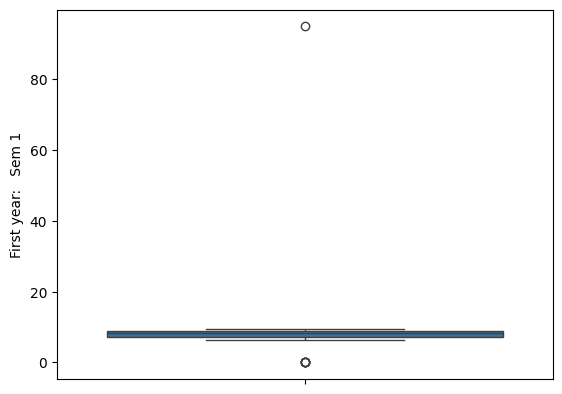

In [11]:
sns.boxplot(y=data['First year:   Sem 1'])

<Axes: ylabel='First year:   Sem 2'>

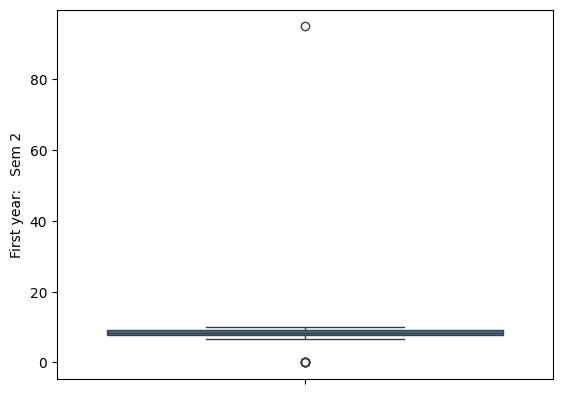

In [12]:
sns.boxplot(y=data['First year:   Sem 2'])

<Axes: ylabel='Second year:   Sem 1'>

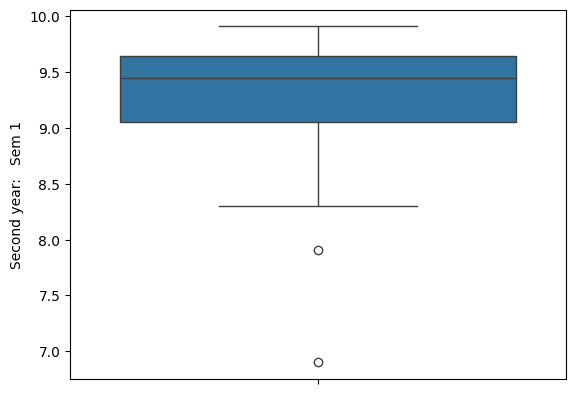

In [13]:
sns.boxplot(y=data["Second year:   Sem 1"])

<Axes: ylabel='Second year:   Sem 2'>

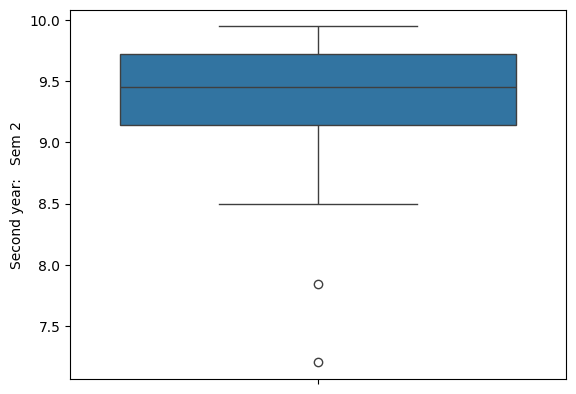

In [14]:
sns.boxplot(y=data["Second year:   Sem 2"])